# Plotting the ratios of extensions for empirical vs conjectured values 

### After running the main simulation software, replace the variables below with the output from basic_seed_chainer. 

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
from  math import log
%matplotlib inline

plt.style.use('science')

extend_cumulative = [9.90307e-6, 2.2776461e-5, 5.3853437e-5, 0.00012645985, 0.00029559562, 0.0006871595, 0.0015788921, 0.0035975159, 0.008116459, 0.018162133, 0.040367972, 0.089336686]
chain_cumulative = [0.00011849474, 0.00022809266, 0.00042297516, 0.0007981488, 0.0015215854, 0.0029083148, 0.005479027, 0.010641336, 0.021041423, 0.04035635, 0.07846263, 0.14949545]
recov_cumulative = [0.9549738198757765, 0.972571647634584, 0.9833691065292096, 0.9900342205151378, 0.994073940546968, 0.9964912778473091, 0.9979337467887491, 0.9987886770212177, 0.9992949422476871, 0.9995913040805938, 0.9997631469210123, 0.999862674628025]
extend_std = [7.008675e-6, 1.1697969e-5, 2.1310758e-5, 3.7554993e-5, 6.550394e-5, 0.00011369939, 0.00019475246, 0.00033605433, 0.00056885387, 0.0009758512, 0.0019815275, 0.0049380516]

extend_cumulative_sketch = [1.8492483e-5, 5.2108302e-5, 0.00013776781, 0.00036057841, 0.0008924879, 0.0021712033, 0.0051318062, 0.011996759, 0.027493117, 0.06259409, 0.14031939, 0.31279048]
chain_cumulative_sketch = [3.3308643e-5, 4.8850015e-5, 7.621892e-5, 0.00011860382, 0.00018763031, 0.0003003712, 0.00049010274, 0.0008097861, 0.0013871193, 0.0024098312, 0.004175731, 0.0075061903]
recov_cumulative_sketch = [0.9428860559006211, 0.9623469331158239, 0.9760944329896907, 0.9848027474017171, 0.9906528870392389, 0.9942789549436796, 0.9965232395757856, 0.9979025346692553, 0.9987496972793459, 0.999254983337655, 0.9995578471600931, 0.9997404123980111]
extend_std_sketch = [1.1436015e-5, 2.202653e-5, 4.3314743e-5, 8.448755e-5, 0.00015776508, 0.00028558177, 0.0005062684, 0.00089785847, 0.0015427556, 0.002752749, 0.0046988684, 0.0080720745]

### Input simulation level variables. 

In [ ]:
#Put in the number of iterations used here and the values of theta.
num_iter = 100000
theta = 0.05

0.46299970927811157 2.159828569998792 2.0 0.07991428499939593
[[0.0124213  0.00947778 0.00718677 0.00536033 0.00398036 0.00293669
  0.00218377 0.00163227 0.0012244  0.00100232 0.00101378]
 [0.01250981 0.0095257  0.00721503 0.00537617 0.00398913 0.00294152
  0.00218643 0.00163379 0.00122525 0.00100282 0.00101419]]


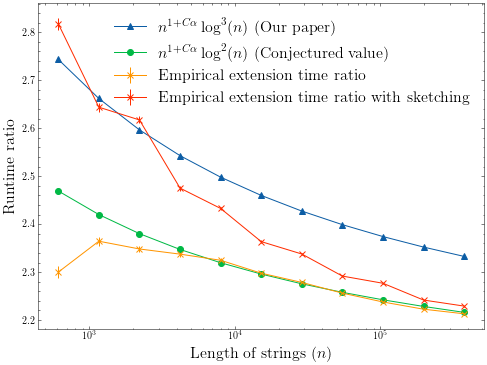

In [8]:
alpha = -log(1 - theta)/log(4)
c = 2/(1 - 2 * alpha)
ci = 1 / c
base = 4**(ci)
rat_al = (4**(ci))**(1 + c * alpha)
rat_chain = (4**(ci))**(1 - c * alpha)
print(ci, c, rat_al, c*alpha)
start = 9

t = scipy.stats.t.ppf((1 + 0.95) / 2., num_iter-1)

#a is iteration i+1, b is iteration i. The ratio is what we're plotting.
a = np.array([extend_cumulative[i] for i in range(1,len(extend_cumulative))])
b = np.array([extend_cumulative[i] for i in range(len(extend_cumulative)-1)])

#We use Fieller's method https://en.wikipedia.org/wiki/Fieller%27s_theorem to compute
#confidence intervals for ratios of data. 
sem_b = np.array([extend_std[i]/ np.sqrt(num_iter) for i in range(len(extend_cumulative)-1)])
one = np.ones(len(sem_b))
sem_a = np.array([extend_std[i] / np.sqrt(num_iter) for i in range(1,len(extend_cumulative))])
g = (t * sem_b / b)**2
Q = a/b
seq = Q/(one - g) * np.sqrt((one - g) * sem_a**2 / a**2 + sem_b**2 / b**2)
conf = np.array([Q/(one - g) - t * seq, Q/(one - g) + t * seq])

#Same thing for sketched ata.
a_s = np.array([extend_cumulative_sketch[i] for i in range(1,len(extend_cumulative_sketch))])
b_s = np.array([extend_cumulative_sketch[i] for i in range(len(extend_cumulative_sketch)-1)])
sem_b_s = np.array([extend_std_sketch[i]/ np.sqrt(num_iter) for i in range(len(extend_cumulative_sketch)-1)])
sem_a_s = np.array([extend_std_sketch[i] / np.sqrt(num_iter) for i in range(1,len(extend_cumulative_sketch))])
g_s = (t * sem_b_s / b_s)**2
Q_s = a_s/b_s
seq_s = Q_s/(one - g_s) * np.sqrt((one - g_s) * sem_a_s**2 / a_s**2 + sem_b_s**2 / b_s**2)
conf_s = np.array([Q_s/(one - g_s) - t * seq_s, Q_s/(one - g_s) + t * seq_s])


#The values of n_{k+1} are 4^((k+1)/C) so that Clog4(n_k) = k + 1, i.e. k is an integer value. 
n_axis = [int(4**(ci* x)) for x in range(start+1,len(extend_cumulative)-1 + start+1)]

plt.figure(figsize=(8, 6))

##Plotting the ratios of extension times for empirical extension runtimes
extend_ratio = np.array([extend_cumulative[i+1]/extend_cumulative[i] for i in range(len(extend_cumulative)-1)])
extend_ratio_sketch = np.array([extend_cumulative_sketch[i+1]/extend_cumulative_sketch[i] for i in range(len(extend_cumulative_sketch)-1)])
conf = np.abs(conf - Q)
print(conf)

##Plotting the ratios of extension times conjectured with n^(1+f(theta)) log^2 n 
align_ratio_guess = [rat_al*(log(base**(i+start+1))/log(base**(i+start)))**2 for i in range(len(extend_cumulative)-1)]

##Plotting the ratios of extension times predicted by our theory as n^(1+f(theta)) log^3 n 
align_ratio_guess_2 = [rat_al*(log(base**(i+start+1))/log(base**(i+start)))**3 for i in range(len(extend_cumulative)-1)]

plt.plot(n_axis,align_ratio_guess_2, '^-', label=r"$n^{1+C \alpha} \log^3(n)$ (Our paper)")
plt.plot(n_axis,align_ratio_guess, 'o-' , label=r"$n^{1+C \alpha} \log^2(n)$ (Conjectured value) ")
plt.errorbar(n_axis,extend_ratio, fmt = 'x-', yerr = conf,  label="Empirical extension time ratio")
plt.errorbar(n_axis,extend_ratio_sketch,fmt = 'x-', yerr = conf,  label="Empirical extension time ratio with sketching")

plt.ylabel("Runtime ratio", fontsize = 16)
plt.xlabel(r"Length of strings $(n)$", fontsize = 16)
plt.xscale('log')
plt.legend(fontsize=16)
#plt.xticks(np.arange(len(extend_cumulative)-1), [int(4**(ci* x)) for x in range(start+1,len(extend_cumulative)-1 + start+1)])
#plt.axhline(rat_al)
plt.show()

# Plotting chaining time vs extension times

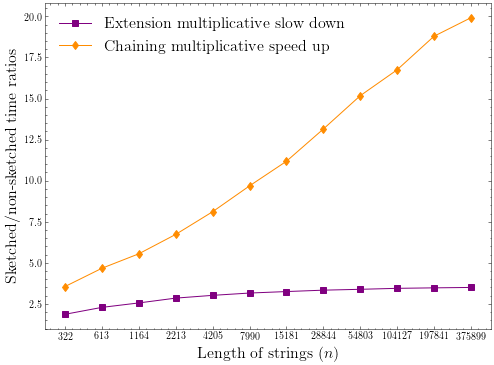

[1.8673485090986937, 2.2878138091778175, 2.5581990245116573, 2.851327199897833, 3.019286618658287, 3.1596787936425246, 3.2502576965202374, 3.3347341147262197, 3.38732900640538, 3.4464063224291994, 3.4760079104295847, 3.50125456858787] [3.5574772589804997, 4.669244420907547, 5.54947721641818, 6.729537041892916, 8.109486148586548, 9.682402307544798, 11.1793437433139, 13.140922028669053, 15.169151636777025, 16.746546397108645, 18.79015434662817, 19.916288293410307]


In [13]:
plt.style.use('science')
    
alpha = -log(1 - theta)/log(4)
c = 2/(1 - 2 * alpha)
ci = 1 / c
start = 9

plt.figure(figsize=(8, 6))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
ratio = [extend_cumulative_sketch[i] / extend_cumulative[i] for i in range(len(extend_cumulative))]
ratio_chain = [chain_cumulative[i] / chain_cumulative_sketch[i] for i in range(len(extend_cumulative))]
plt.plot(ratio,'s-', color='purple',label = "Extension multiplicative slow down");
plt.plot(ratio_chain,'d-', color='darkorange',label='Chaining multiplicative speed up');
#plt.title(r"Sketching with density $1/c = \frac{1}{\frac{2}{1 - 2 \alpha} \log n - 6}$", fontsize=16)
#plt.title(r"$\theta$ = 0.05")
plt.xticks(np.arange(len(extend_cumulative)), [int(4**(ci* x)) for x in range(start,len(extend_cumulative)-1 + start+1)])
plt.legend(fontsize=16)
plt.xlabel(r"Length of strings $(n)$", fontsize = 16)
plt.ylabel(r"Sketched/non-sketched time ratios", fontsize = 16)
plt.show()

print(ratio, ratio_chain)